In [0]:
                                            #importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


In [0]:
#from google.colab import files
#uploaded=files.upload()

In [0]:
df=pd.read_excel('EXAMPLE DATASET.xlsx',skiprows=1)    #loading dataset

In [32]:
df.head(5)                                    #displaying some dataset rows

,VH,VV,E,Unnamed: 3,TD,HD,VD
0,1.0,1.0,0.296,NaN,0.075670,0.065,0.039
1,3.0,1.0,0.427,NaN,0.085855,0.076,0.039
2,5.0,1.0,0.538,NaN,0.082298,0.072,0.039
3,7.0,1.0,0.541,NaN,0.053310,0.036,0.039
4,9.0,1.0,0.557,NaN,0.088335,0.079,0.039


In [0]:
del df['Unnamed: 3']               #removing unnecessary column

In [6]:
df.describe()                                 #dataset summary

,VH,VV,E,TD,HD,VD
count,42432.000000,42432.00000,42432.000000,43517.000000,42432.000000,4051.000000
mean,52.000000,8.00000,2.621385,1.628009,1.545113,-0.285219
std,30.017016,4.58263,3.491392,1.174938,1.144575,0.696134
min,1.000000,1.00000,0.091000,0.000000,0.001000,-6.436000
25%,26.500000,4.50000,0.585000,0.841801,0.728000,-0.608000
50%,52.000000,8.00000,1.026000,1.464806,1.356000,-0.217000
75%,77.500000,11.50000,2.597000,2.237894,2.141000,0.039000
max,103.000000,15.00000,15.461000,19.616844,19.515000,2.798000


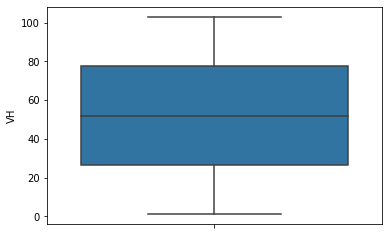

In [7]:
sns.boxplot(y="VH", data = df)                  #to check whether outliers exist

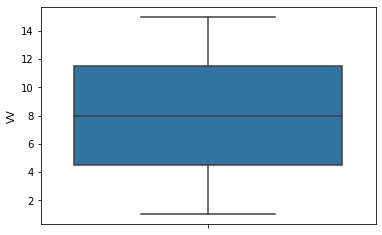

In [8]:
sns.boxplot(y="VV", data = df)    #to check whether outliers exist


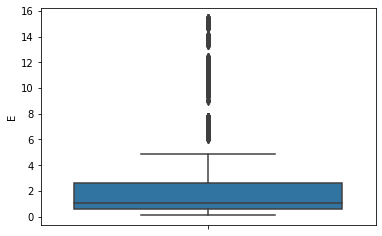

In [9]:
sns.boxplot(y="E", data = df)  #to check whether outliers exist

In [10]:
df.corr(method='pearson')               #to check the dependency between columns

,VH,VV,E,TD,HD,VD
VH,1.000000,0.000000,0.003943,-0.114815,-0.110529,0.261228
VV,0.000000,1.000000,-0.418478,0.446446,0.367139,-0.204105
E,0.003943,-0.418478,1.000000,-0.106192,-0.071798,0.079393
TD,-0.114815,0.446446,-0.106192,1.000000,0.979149,-0.305065
HD,-0.110529,0.367139,-0.071798,0.979149,1.000000,-0.145237
VD,0.261228,-0.204105,0.079393,-0.305065,-0.145237,1.000000


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


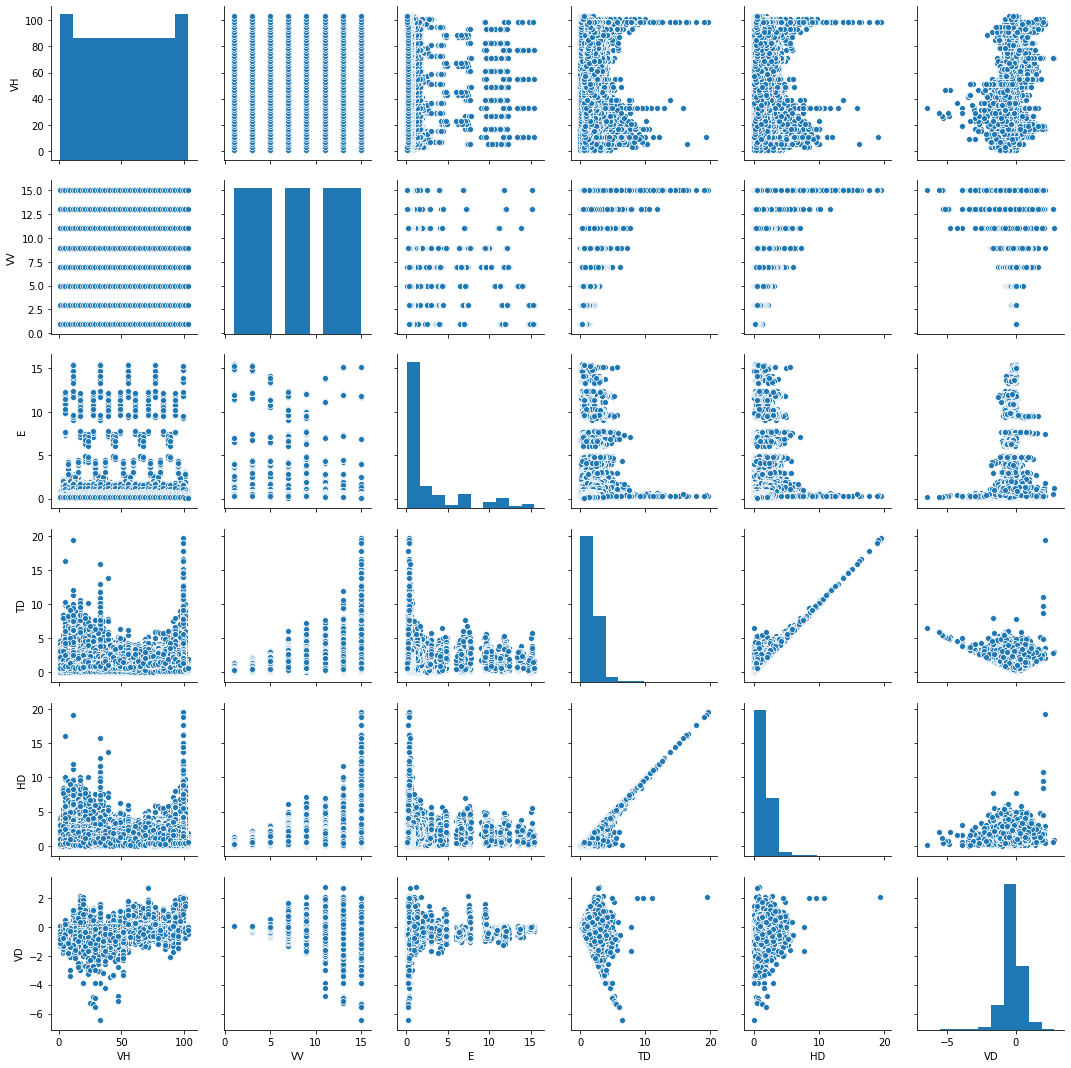

In [11]:
sns.pairplot(df)

In [12]:
#removing outlier in column 'E'

lower_bound=0.1
upper_bound=0.85
res=df.E.quantile([lower_bound,upper_bound])
res

0.10    0.38100
0.85    6.44835
Name: E, dtype: float64

In [13]:
true_index=(res.loc[lower_bound] < df.E.values)&(df.E.values < res.loc[upper_bound])
true_index

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


array([False,  True,  True, ..., False, False, False])

In [14]:
df['E']=df.E[true_index]
print(df['E'].head(10))

0      NaN
1    0.427
2    0.538
3    0.541
4    0.557
5    0.617
6    0.578
7    0.591
8    0.626
9    0.571
Name: E, dtype: float64


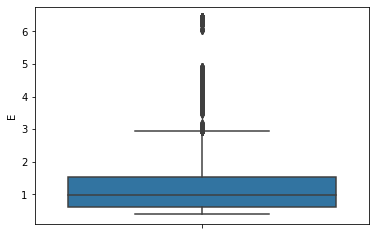

In [15]:
sns.boxplot(y="E", data = df)   #after removing big outliers still small outliers exist

In [0]:
#df.fillna(df.mean)
#df.isnull().sum()

#replacing null values indiviually

df['VH'].fillna(df['VH'].mean(), inplace=True)
df['VV'].fillna(df['VV'].mean(), inplace=True)
df['E'].fillna(df['E'].mean(), inplace=True)
df['TD'].fillna(df['TD'].mean(), inplace=True)
df['HD'].fillna(df['HD'].mean(), inplace=True)
df['VD'].fillna(df['VD'].mean(), inplace=True)


In [17]:
df.isnull().sum()      #now checking if any null value exist or not
df.dtypes

VH    float64
VV    float64
E     float64
TD    float64
HD    float64
VD    float64
dtype: object

In [18]:
y = df[['TD','HD','VD']]
X = df[['VH','VV','E']]
y


,TD,HD,VD
0,0.075670,0.065000,0.039000
1,0.085855,0.076000,0.039000
2,0.082298,0.072000,0.039000
3,0.053310,0.036000,0.039000
4,0.088335,0.079000,0.039000
...,...,...,...
927641,0.000000,1.545113,-0.285219
927642,0.000000,1.545113,-0.285219
927643,0.000000,1.545113,-0.285219
927644,0.000000,1.545113,-0.285219


In [0]:
#randomly spliting the dataset 
X_train, X_test, y_train, y_test = train_test_split(
    X, y,random_state=4)


#Applying Randomforest regressor
max_depth = 50
regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,
                                                          max_depth=max_depth,
                                                          random_state=0))


In [0]:
regr_multirf.fit(X_train, y_train)
# Predict on new data
y_multirf = regr_multirf.predict(X_test)


In [28]:
from sklearn.metrics import mean_squared_error

#checking the root mean square error 
mean_squared_error(y_test, y_multirf)

0.02346706665140609

In [22]:
print(y_multirf)

[[ 1.62600619  1.54511278 -0.28521938]
 [ 1.62600619  1.54511278 -0.28521938]
 [ 1.62600619  1.54511278 -0.28521938]
 ...
 [ 1.62600619  1.54511278 -0.28521938]
 [ 1.62600619  1.54511278 -0.28521938]
 [ 1.62600619  1.54511278 -0.28521938]]
